In [18]:
#모듈 호출
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier #k-최근접 이웃 모듈 호출
from sklearn.linear_model import LinearRegression #선형 회귀 모듈 호출

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt # 파이썬에서 대표적인 데이터 시각화 모듈
import numpy as np
import pandas as pd

#로그
print("모듈 호출이 완료되었습니다.")

모듈 호출이 완료되었습니다.


In [19]:
#자료 준비
perch_length = np.array([
    2.254235614, 7.502592373, 2.7133517, 9.774520461, 6.868457725,
    7.998949532, 6.82279956, 5.080419862, 6.320125937, 5.641808831,
    9.647420926, 4.833828725, 6.818462161, 8.984591741, 3.473591965,
    3.390873174, 9.340974918, 9.907476389, 9.578590379, 0.1375056881
])

perch_weight = np.array([
    1.378475153, 19.54178666, 4.356272581, 26.5716189, 14.60446541,
    20.57696067, 17.63283101, 11.21315166, 13.81481571, 9.934975248,
    25.98258652, 11.36386745, 16.48987672, 22.7417226, 7.707193976,
    4.526956387, 21.78839736, 25.58939317, 23.96109, -6.699647042
])




#로그
print(f"농어 데이터가 준비되었습니다.")
print(f"길이 데이터 {len(perch_length)}개 / 무게 데이터 {len(perch_weight)}개")

농어 데이터가 준비되었습니다.
길이 데이터 20개 / 무게 데이터 20개


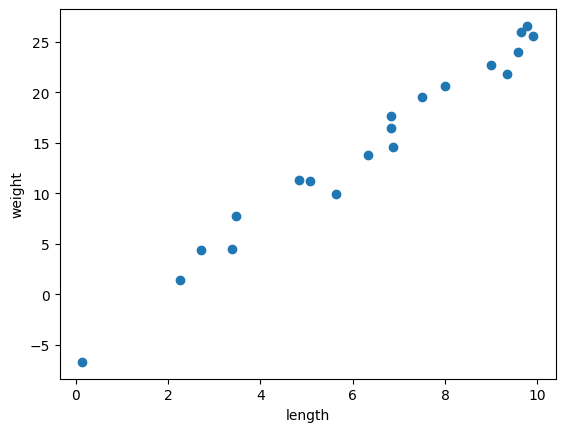

In [20]:
#데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
#데이터 분리
train_input, test_input, train_target, test_target = \
    train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print("데이터가 준비되었습니다.")

[[2.25423561]
 [9.90747639]
 [3.39087317]
 [7.50259237]
 [6.32012594]]
데이터가 준비되었습니다.


In [22]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

score = knr.score(test_input, test_target)
print(f"점수 계산 결과: {score*100}%")

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(f"평균 오차: {mae}")

점수 계산 결과: 90.16853293405158%
평균 오차: 2.25419962792


In [23]:
#과소 적합
print("훈련 세트 결과>> ",knr.score(train_input, train_target)) #훈련 세트 결과
print("테스트 세트 결과>> ",knr.score(test_input, test_target)) #테스트 세트 결과

훈련 세트 결과>>  0.8359394463950541
테스트 세트 결과>>  0.9016853293405158


In [24]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)

score = knr.score(test_input, test_target)
print(f"점수 계산 결과: {score*100}%")

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(f"평균 오차: {mae}") 

점수 계산 결과: 94.96268309224915%
평균 오차: 1.6281047928000008


In [25]:
#적절한 결과
print("훈련 세트 결과>> ",knr.score(train_input, train_target)) #훈련 세트 결과
print("테스트 세트 결과>> ",knr.score(test_input, test_target)) #테스트 세트 결과

훈련 세트 결과>>  0.9148215418253159
테스트 세트 결과>>  0.9496268309224916


[25.50509847]


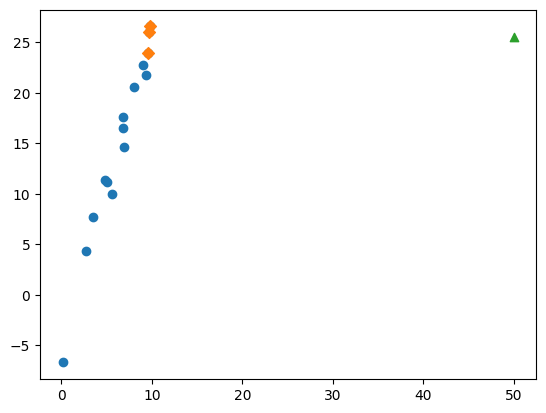

In [26]:
#아주 큰 농어
big = [50]
print(knr.predict([big]))

#원인 파악하기
distances, indexes = knr.kneighbors([big])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(big, knr.predict([big]), marker='^')
plt.show()

#즉 범위 밖의 샘플을 예측할 수 없다

In [ ]:
#선형 회귀
lr = LinearRegression()
#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

#50cm 농어에 대한 예측
print(lr.predict([big]))

#모델 파악
print(f"무게 = 길이 X {lr.coef_} + ({lr.intercept_})")

[151.25484677]
무게 = 길이 X [3.12838437] - (-5.16437153313027)


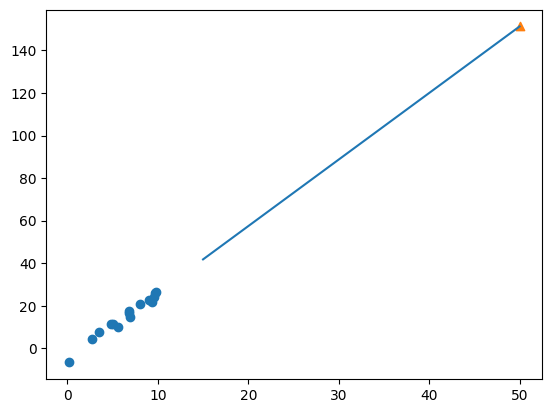

0.973088538900617
0.9918999338028814


In [28]:
#훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
#15에서 50까지 1차 방정식 그래프를 그립니다
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

#50cm 농어 데이터
plt.scatter(big, lr.predict([big]), marker='^')
plt.show()

#과대적합
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

In [ ]:
#다항 회귀 - 2차 방정식
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

#모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[big[0]**2, big[0]]])) #큰 농어

#모델 파악
print(f"y = x**2 X {lr.coef_[0]} - x X {lr.coef_[1]} + ({lr.intercept_})")

[63.60019509]
y = x**2 X -0.04463719551691975 - x X 3.627343603665336 - (-6.173996300027939)


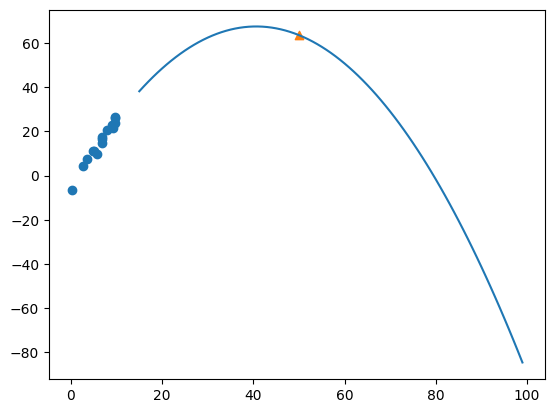

0.9748942143549978
0.9908559648998274


In [30]:
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 100)

#훈련 데이터의 산점도를 그립니다
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)

#50cm 농어 데이터
plt.scatter(big, lr.predict([[big[0]**2, big[0]]]), marker='^')
plt.show()

#모델 채점
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

[2948.46523458]
y = x**3 X 0.032264861811691206 + x**2 X -0.5429413076681047 + x X 5.601646798462536 + (-7.371562634265684)
[ 0.03226486 -0.54294131  5.6016468 ]


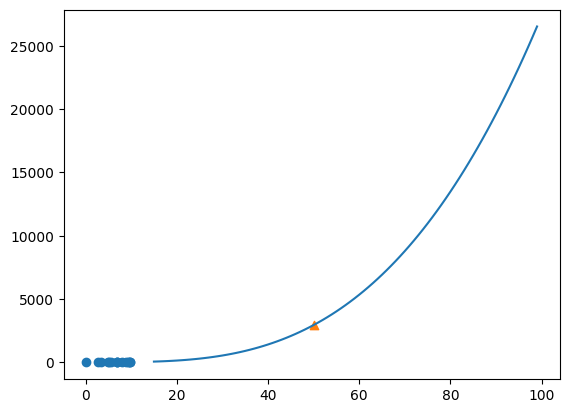

0.9801207663041721
0.9735027732163666


In [31]:
#다항 회귀 - 3차 방정식
big = [50]

train_poly = np.column_stack((train_input ** 3, train_input ** 2, train_input))
test_poly = np.column_stack((test_input**3 ,test_input ** 2, test_input))

#모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[big[0]**3,big[0]**2, big[0]]])) #큰 농어

#모델 파악
print(f"y = x**3 X {lr.coef_[0]} + x**2 X {lr.coef_[1]} + x X {lr.coef_[2]} + ({lr.intercept_})")
print(lr.coef_)
#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 100)

#훈련 데이터의 산점도를 그립니다
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**3 + lr.coef_[1]*point**2 + lr.coef_[2]*point + lr.intercept_)

#50cm 농어 데이터
plt.scatter(big, lr.predict([[big[0]**3, big[0]**2, big[0]]]), marker='^')
plt.show()

#모델 채점 - 과대적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

[-15807.6058453]
y = x**4 X -0.0046619192638868 + x**3 X 0.12702173365390607 + x**2 X -1.1538484422700215 + x X 6.878520551159172 + (-7.632074631450861)


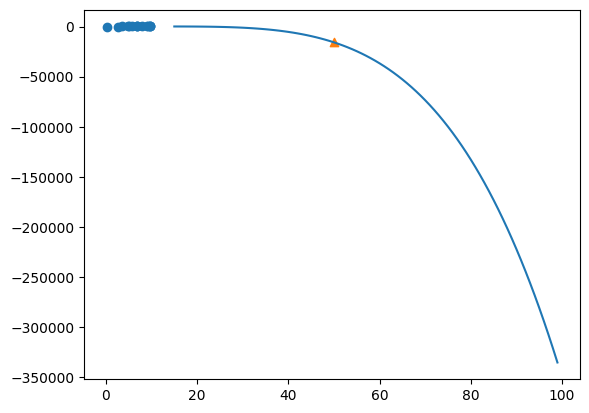

0.9805279143460794
0.9707447164025627


In [32]:
#다항 회귀 - 4차 방정식
train_poly = np.column_stack((train_input ** 4, train_input ** 3, train_input ** 2, train_input))
test_poly = np.column_stack((test_input**4 ,test_input**3 ,test_input ** 2, test_input))

#모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[big[0]**4,big[0]**3,big[0]**2, big[0]]])) #큰 농어

#모델 파악
print(f"y = x**4 X {lr.coef_[0]} + x**3 X {lr.coef_[1]} + x**2 X {lr.coef_[2]} + x X {lr.coef_[3]} + ({lr.intercept_})")

#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 100)

#훈련 데이터의 산점도를 그립니다
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**4 +lr.coef_[1]*point**3 + lr.coef_[2]*point**2 + lr.coef_[3]*point + lr.intercept_)

#50cm 농어 데이터
plt.scatter(big, lr.predict([[big[0]**4,big[0]**3, big[0]**2, big[0]]]), marker='^')
plt.show()

#모델 채점 - 과대적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

[401354.17445019]
y = x**5 X 0.002360335022390327 + x**4 X -0.06677071575509645 + x**3 X 0.71478665330712 + x**2 X -3.5163638204428413 + x X 10.342525361252005 + (-8.094957780272727)


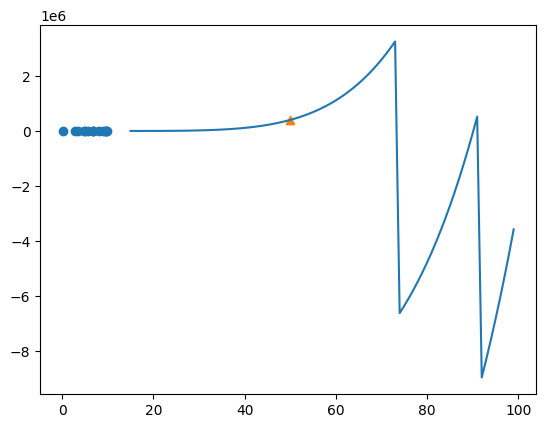

0.9809100596718245
0.9643336855689185


In [33]:
#다항 회귀 - 5차 방정식
train_poly = np.column_stack((train_input ** 5 ,train_input ** 4, train_input ** 3, train_input ** 2, train_input))
test_poly = np.column_stack((test_input**5 ,test_input**4 ,test_input**3 ,test_input ** 2, test_input))

#모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[big[0]**5,big[0]**4,big[0]**3,big[0]**2, big[0]]])) #큰 농어

#모델 파악
print(f"y = x**5 X {lr.coef_[0]} + x**4 X {lr.coef_[1]} + x**3 X {lr.coef_[2]} + x**2 X {lr.coef_[3]} + x X {lr.coef_[4]} + ({lr.intercept_})")

#구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 100)

#훈련 데이터의 산점도를 그립니다
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**5 + lr.coef_[1]*point**4 + lr.coef_[2]*point**3 + lr.coef_[3]*point**2 + lr.coef_[4]*point + lr.intercept_)

#50cm 농어 데이터
plt.scatter(big, lr.predict([[big[0]**5,big[0]**4,big[0]**3, big[0]**2, big[0]]]), marker='^')
plt.show()

#모델 채점 - 과대적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

In [34]:
#다중 회귀 - degree=2
from sklearn.preprocessing import PolynomialFeatures
#데이터 준비 - pandas
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()  
train_input = perch_full
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#다항 특성 만들기
poly = PolynomialFeatures(degree=2 , include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)
print(poly.get_feature_names_out())

test_poly = poly.transform(test_input)

ValueError: Found input variables with inconsistent numbers of samples: [56, 20]

In [ ]:
#다중 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

print("훈련 세트 채점 결과>>",lr.score(train_poly, train_target)*100,"%")
print("체점 세트 채점 결과>>",lr.score(test_poly, test_target)*100,"%")

훈련 세트 채점 결과>> 99.03183436982125 %
체점 세트 채점 결과>> 97.14559911594125 %


In [ ]:
#다중 회귀 - degree=5
#데이터 준비 - pandas
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
train_input = perch_full
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#다항 특성 만들기
poly = PolynomialFeatures(degree=5 , include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)
print(poly.get_feature_names_out())
test_poly = poly.transform(test_input)

#다중 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

#모델 채점 - 과대적합
print("훈련 세트 채점 결과>>",lr.score(train_poly, train_target)*100,"%")
print("체점 세트 채점 결과>>",lr.score(test_poly, test_target)*100,"%")

(42, 55)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']
훈련 세트 채점 결과>> 99.99999999997232 %
체점 세트 채점 결과>> -14440.564483377855 %


In [ ]:
#과대적합을 방지하기 위해 규제하기 - 릿지 회귀, 라쏘 회귀
#규제 전에 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
#릿지 회귀 모델 훈련
ridge = Ridge(alpha=100) #alpha값을 조정하여 규제의 강도를 조절할 수 있다. alpha = 하이퍼파라미터
ridge.fit(train_scaled, train_target)

print("훈련 세트 채점 결과>>",ridge.score(train_scaled, train_target)*100,"%")
print("체점 세트 채점 결과>>",ridge.score(test_scaled, test_target)*100,"%")

훈련 세트 채점 결과>> 98.41843235774495 %
체점 세트 채점 결과>> 96.2704264105029 %


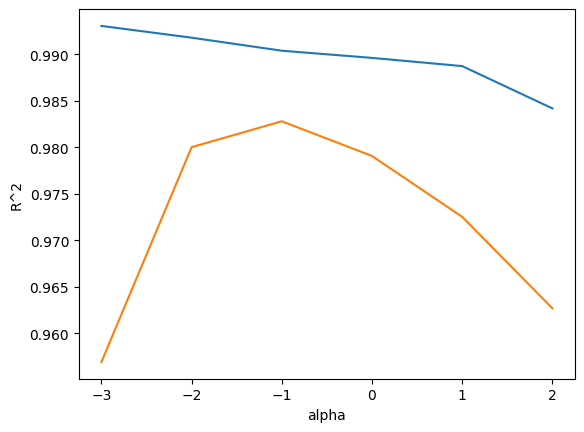

In [ ]:
#릿지 회귀 모델 훈련 - 하이퍼파라미터 조정
alpha_list = [0.001, 0.01, 0.1 ,1, 10, 100]
log1 = []
log2 = []
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) #alpha값을 조정하여 규제의 강도를 조절할 수 있다. alpha = 하이퍼파라미터
    ridge.fit(train_scaled, train_target)
    log1.append(ridge.score(train_scaled, train_target))
    log2.append(ridge.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), log1)
plt.plot(np.log10(alpha_list), log2)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

#왼쪽은 과대적합, 오른쪽은 과소적합

In [ ]:
#라쏘 회귀 모델 훈련
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print("훈련 세트 채점 결과>>",lasso.score(train_scaled, train_target)*100,"%")
print("체점 세트 채점 결과>>",lasso.score(test_scaled, test_target)*100,"%")

print("사용한 특성의 개수>>",np.sum(lasso.coef_ != 0)) #일부 특성을 사용하지 않을 수 있다.

훈련 세트 채점 결과>> 98.9789897208096 %
체점 세트 채점 결과>> 98.00593698421883 %
사용한 특성의 개수>> 13


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

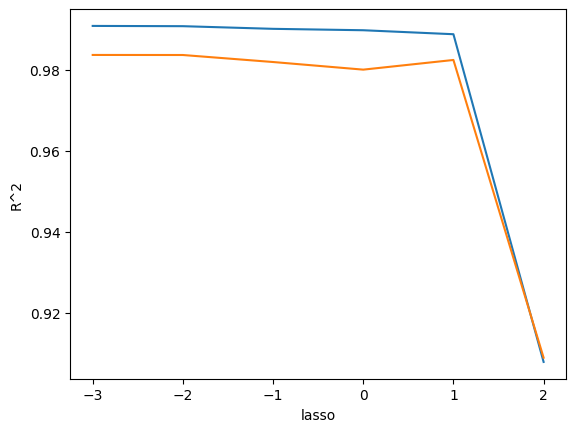

In [ ]:
#라쏘 회귀 모델 훈련 - 하이퍼파라미터 조정
alpha_list = [0.001, 0.01,0.1, 1, 10, 100]
log1 = []
log2 = []
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha) #alpha값을 조정하여 규제의 강도를 조절할 수 있다. alpha = 하이퍼파라미터
    lasso.fit(train_scaled, train_target)
    log1.append(lasso.score(train_scaled, train_target))
    log2.append(lasso.score(test_scaled, test_target))
plt.plot(np.log10(alpha_list), log1)
plt.plot(np.log10(alpha_list), log2)
plt.xlabel('lasso')
plt.ylabel('R^2')
plt.show()

#왼쪽은 과대적합, 오른쪽은 과소적합
#적절한 alpha값은 -1 ~ 1 사이

In [ ]:
#확률 계산하기
#데이터 준비
fish = pd.read_csv("https://bit.ly/fish_csv_data") #데이터 불러오기
print(fish.head(5)) #가장 앞에 5개의 데이터 출력

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() #입력값
fish_target = fish['Species'].to_numpy() #출력값

#데이터 나누기
train_input, test_input, train_target, test_target = \
    train_test_split(fish_input, fish_target, random_state=42)

#표준화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [ ]:
#k-최근접 이웃의 다중 분류
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

#체점
print("학습 데이터 채점>>",kn.score(train_input, train_target)*100,"%")
print("테스트 데이터 채점>>",kn.score(test_input, test_target)*100,"%")

#학습된 클래스와, 테스트 결과
print(kn.classes_)
print(kn.predict(test_scaled[:5]))

#확률
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

학습 데이터 채점>> 10.92436974789916 %
테스트 데이터 채점>> 10.0 %
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
#로지스틱 회귀 - 인공신경망의 기초
from sklearn.linear_model import LogisticRegression
#로지스틱 함수(시그모이드 함수)를 사용해서 0~1까지의 범위로 변환한다 - 확률을 얻기 위해
from scipy.special import expit
#하지만 다중 분류의 경우에는, 시그모이드 함수를 사용했을 때. 전체 합이 1이 나이지 않아, 소프트맥스 함수를 사용해야 한다
from scipy.special import softmax

In [ ]:
#로지스틱 회귀 - 이진 분류
#데이터 준비
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') #도미와 빙어만 뽑아내기
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
#모델 학습
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print("5개 채점>>",lr.predict(train_bream_smelt[:5]))
print("확률>>",lr.predict_proba(train_bream_smelt[:5]))

#롲지스틱 회귀 계수 확인
print(f'z = {lr.coef_[0][0]} x 무게 - {lr.coef_[0][1]} x 길이 - {lr.coef_[0][2]} x 대각선 - {lr.coef_[0][3]} x 높이 - {lr.coef_[0][4]} x 두께 - {lr.intercept_}')

decisions = lr.decision_function(train_bream_smelt[:5])
print("z값>>",decisions)
print("확률로 변환>>",expit(decisions)) #아진 분류이므로, 양성 클래스의 z값만 반환한

5개 채점>> ['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
확률>> [[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
z = -0.40451731516033246 x 무게 - -0.5758278724212899 x 길이 - -0.6624815822749136 x 대각선 - -1.0132961448903668 x 높이 - -0.7312313106844903 x 두께 - [-2.16172774]
z값>> [-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
확률로 변환>> [0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [ ]:
#로지스틱 회귀 - 다중 분류
lr = LogisticRegression(C=20, max_iter=1000) #C값이 작아질수록 규제가 강해짐(L2)
lr.fit(train_scaled, train_target)

#모델 분석
print("학습 세트 채점 결과>>",lr.score(train_scaled, train_target))
print("테스트 세트 채점 결과>>",lr.score(test_scaled, test_target))

#확률
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

print(lr.coef_.shape, lr.intercept_.shape) #선형 함수 (식)의 크기


학습 세트 채점 결과>> 0.9327731092436975
테스트 세트 채점 결과>> 0.925
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
(7, 5) (7,)


In [ ]:
#확률을 소프트맥스 함수로 구하기
#z 값
decision = lr.decision_function(test_scaled[:5])
print("z값")
print(np.round(decision, decimals=2))

#확률로 변환하기 
proba = softmax(decision, axis = 1)
print("확률로 변환된 값") 
print(np.round(proba, decimals=3))

z값
[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]
확률로 변환된 값
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
